<a href="https://colab.research.google.com/github/CarlosBaez11/Carlos_Baez_C/blob/main/Talleres/2b_Deteccion_de_anomalias_IF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 2b: Detección de anomalías con Isolation Forest



In [9]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, make_scorer

random_state = 1234

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

--2025-03-30 16:28:56--  https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e
Resolving docs.google.com (docs.google.com)... 142.251.179.101, 142.251.179.138, 142.251.179.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.179.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download [following]
--2025-03-30 16:28:56--  https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.155.132, 2607:f8b0:4004:c23::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.155.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70633109 (67M) [application/octet-stream]
Saving to: ‘creditcard.pkl’

creditcard.pkl      100%[===================>]  67.36M  61.5MB/

In [3]:
#Cargamos los datos
df = pd.read_pickle('creditcard.pkl')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

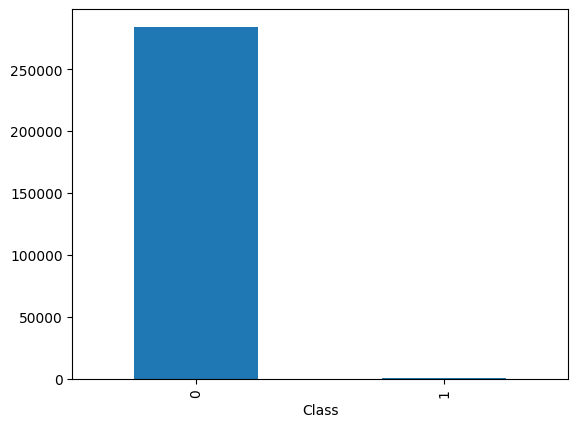

In [8]:
#Exploramos la variable objetivo
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar')

In [5]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='Class'),
    df['Class'],
    test_size=0.2,
    stratify=df['Class'],
    random_state=random_state
)

In [6]:
#Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(steps = [
        ('classifier', rf_base),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': list(range(2, 8)),
    'classifier__min_samples_leaf': [1, 10, 50]
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [7]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf.best_params_

In [ ]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f'Accuracy: {rf.score(X_train, y_train)}')
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print('\n')

In [ ]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f'Accuracy: {rf.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print('\n')

In [ ]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test,rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [11]:
#Entrenaremos un classificador Isolation forest para resolver este problema
isolation_forest = IsolationForest(random_state=random_state)

pipeline_if = Pipeline(steps = [
        ('classifier', isolation_forest),
                            ])

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid_if = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__contamination': np.linspace(0.01, 0.5, 10),
}

In [12]:
def anomaly_f1_score(estimator, X, y):
    y_pred = estimator.fit(X).predict(X)  # Predecir anomalías
    y_pred = (y_pred == -1).astype(int)   # Convertir (-1 → 1, 1 → 0)
    return f1_score(y, y_pred)            # Calcular F1-score

scorer = make_scorer(anomaly_f1_score, greater_is_better=True)

In [13]:
grid_search = GridSearchCV(pipeline_if, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Mejor modelo
print(f"Mejor parámetro contamination: {grid_search.best_params_['classifier__contamination']}")
print(f"Mejor F1-score: {grid_search.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: 

KeyboardInterrupt: 

In [ ]:
#Graficar la matriz de confusión para Isolation forest